In [6]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
#import en_core_web_sm

from spacy.lang.fr.stop_words import STOP_WORDS




In [7]:
df = pd.read_csv('data/Amazon_Unlocked_Mobile.csv')

In [8]:
df.columns

Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes'],
      dtype='object')

In [9]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [10]:
df.describe()

,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [12]:
df.duplicated().sum()

64079

In [13]:
df = df.drop_duplicates()


In [14]:
df.isna().sum()

Product Name        0
Brand Name      54737
Price            5237
Rating              0
Reviews            57
Review Votes    12274
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349761 entries, 0 to 413829
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  349761 non-null  object 
 1   Brand Name    295024 non-null  object 
 2   Price         344524 non-null  float64
 3   Rating        349761 non-null  int64  
 4   Reviews       349704 non-null  object 
 5   Review Votes  337487 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.7+ MB


In [16]:
# Convert brand names to lowercase if the value is a string
df["Brand Name"] = df["Brand Name"].apply(lambda x: x.lower() if isinstance(x, str) else x)


In [17]:
df[df["Price"].isna()]["Product Name"].value_counts().head(20)


Product Name
Apple iPhone 4S 32GB Unlocked GSM Smartphone w/ 8MP Camera w/ Siri & iCloud - Black (Certified Refurbished)                                                      881
BLU S480U Unlocked Studio 7.0 II Smartphone with 5MP Main Camera (Gold)                                                                                          648
Apple Iphone 4 - 8gb Sprint (CDMA) White, Smartphone, in box with all the accessories, clean esn!!                                                               566
Studio 7.0 LTE - Smartphone - GSM Unlocked - White                                                                                                               405
Studio 7.0 LTE - Smartphone - GSM Unlocked - Gold                                                                                                                391
Studio 7.0 LTE - Smartphone - GSM Unlocked - Grey                                                                                                                3

In [18]:
# Convert product names to lowercase
df["Product Name"] = df["Product Name"].str.lower()


In [19]:
brands = [
    "samsung", "apple", "blu", "lg", "nokia", "blackberry", "motorola", "cnpgd", "htc", "sony", "otterbox", 
    "posh mobile", "huawei", "lg electronics", "lenovo", "asus", "zte", "polaroid", "alcatel", "verykool", 
    "casio", "figo", "pantech", "ultrabox", "star", "microsoft", "sky devices", "kyocera", "sandisk", "ecoopro", 
    "oneplus", "nextbit", "honor", "juning", "hipipooo"
]


def complete_brand_name(row):
    if pd.isna(row["Brand Name"]):  
        for brand in brands:
            if brand in row["Product Name"]:
                return brand  
    return row["Brand Name"]

df["Brand Name"] = df.apply(complete_brand_name, axis=1)


In [ ]:
# Fill in the "Brand Name" column based on the presence of the words like  "moto" or "iphone" in the "Product Name" column
df.loc[df["Product Name"].str.contains("moto", case=False, na=False), "Brand Name"] = "motorola"
df.loc[df["Product Name"].str.contains("iphone", case=False, na=False), "Brand Name"] = "apple"


In [21]:
# Fill missing values in 'Review Votes' with 0 and convert to integer type

df['Review Votes'] = df['Review Votes'].fillna(0).astype(int)


In [ ]:
# Delete null values 'Brand Name' or 'Price'
df.dropna(subset=['Brand Name', 'Price','Reviews'], inplace=True)

## EDA

In [ ]:
# colors
fluorescent_palette = [
    "#00FFFF",  # Cian brillante
    "#FF00FF",  # Magenta brillante
    "#FF0033",  # Rojo brillante
    "#FF6600",  # Naranja brillante
    "#FFDD00",  # Amarillo dorado
    "#FFFF00",  # Amarillo brillante
    "#00FF00"   # Verde fluorescente
]


C:\Users\eugem\AppData\Local\Temp\ipykernel_18732\1820961673.py:6: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.barplot(x=rating_counts.index, y=rating_counts.values, hue=rating_counts.index, palette=fluorescent_palette, dodge=False,legend=False,alpha=1)


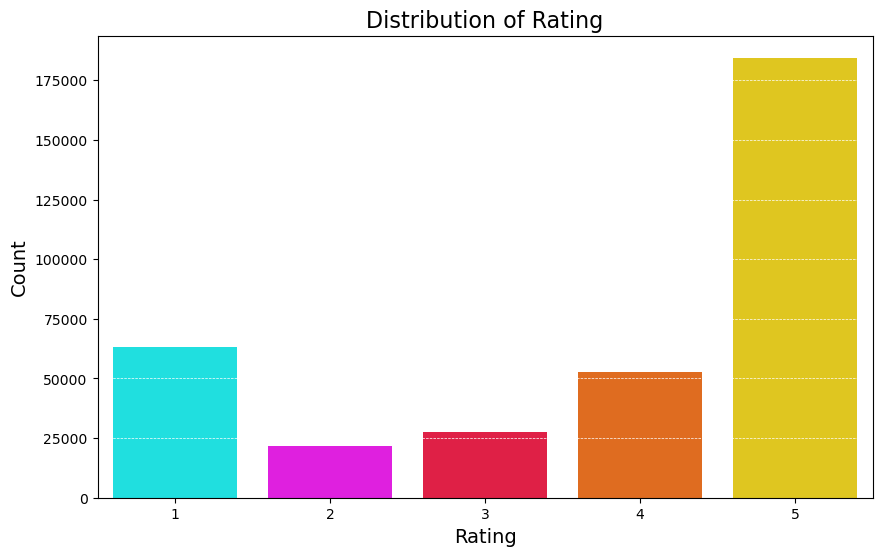

In [ ]:
# Get values for the rating distribution
rating_counts = df['Rating'].value_counts().sort_index()

# Create the bar plot using Seaborn and assign the color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, hue=rating_counts.index, palette=fluorescent_palette, dodge=False,legend=False,alpha=1)

# Title and labels
plt.title('Distribution of Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Configure the grid only on the horizontal background
plt.grid(axis='y', color='white', linestyle='--', linewidth=0.5)

#Show
plt.show()


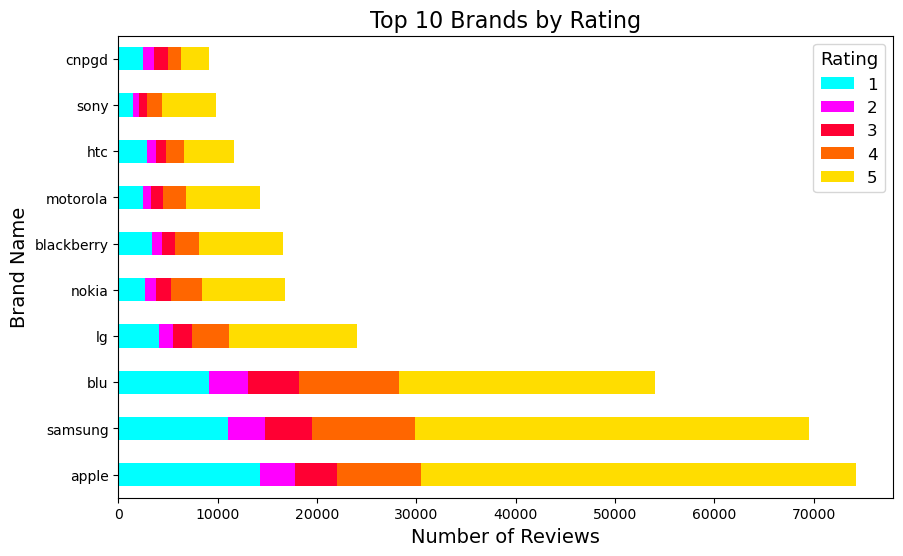

In [24]:
# Calculate the count of each rating per brand
rating_counts = df.groupby(['Brand Name', 'Rating']).size().unstack(fill_value=0)

# Select the top 10 brands based on the total number of reviews (or any other criteria you prefer)
top_brands = rating_counts.sum(axis=1).sort_values(ascending=False).head(10).index
rating_counts_top_brands = rating_counts.loc[top_brands]

# Create a stacked bar plot
rating_counts_top_brands.plot(kind='barh', stacked=True, color=fluorescent_palette, figsize=(10, 6))

# Customize the plot
plt.title('Top 10 Brands by Rating', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Brand Name', fontsize=14)
plt.legend(title='Rating', title_fontsize='13', fontsize='12')

# Show the plot
plt.show()

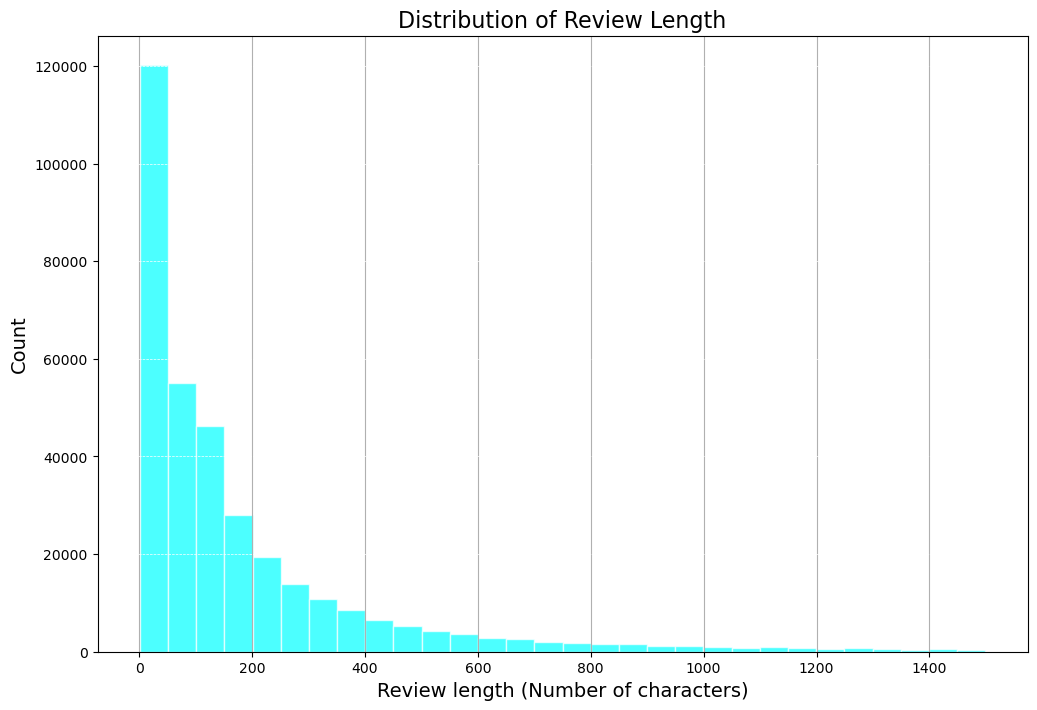

In [25]:
# Plot distribution of review length with custom style
review_length = df["Reviews"].dropna().map(lambda x: len(x))

# Crear el gráfico con un estilo oscuro y colores vibrantes
plt.figure(figsize=(12, 8))
review_length.loc[review_length < 1500].hist(bins=30, color=fluorescent_palette[0], edgecolor='white', alpha=0.7)

# Título y etiquetas
plt.title("Distribution of Review Length", fontsize=16)
plt.xlabel('Review length (Number of characters)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Configurar la grilla solo en el fondo horizontal
plt.grid(axis='y', color='white', linestyle='--', linewidth=0.5)


# Mostrar el gráfico
plt.show()


C:\Users\eugem\AppData\Local\Temp\ipykernel_18732\520811562.py:11: UserWarning: 
The palette list has fewer values (7) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="Brand Name", y="Price", data=top_10_df, ax=ax, palette=fluorescent_palette, hue="Brand Name" , legend=False)


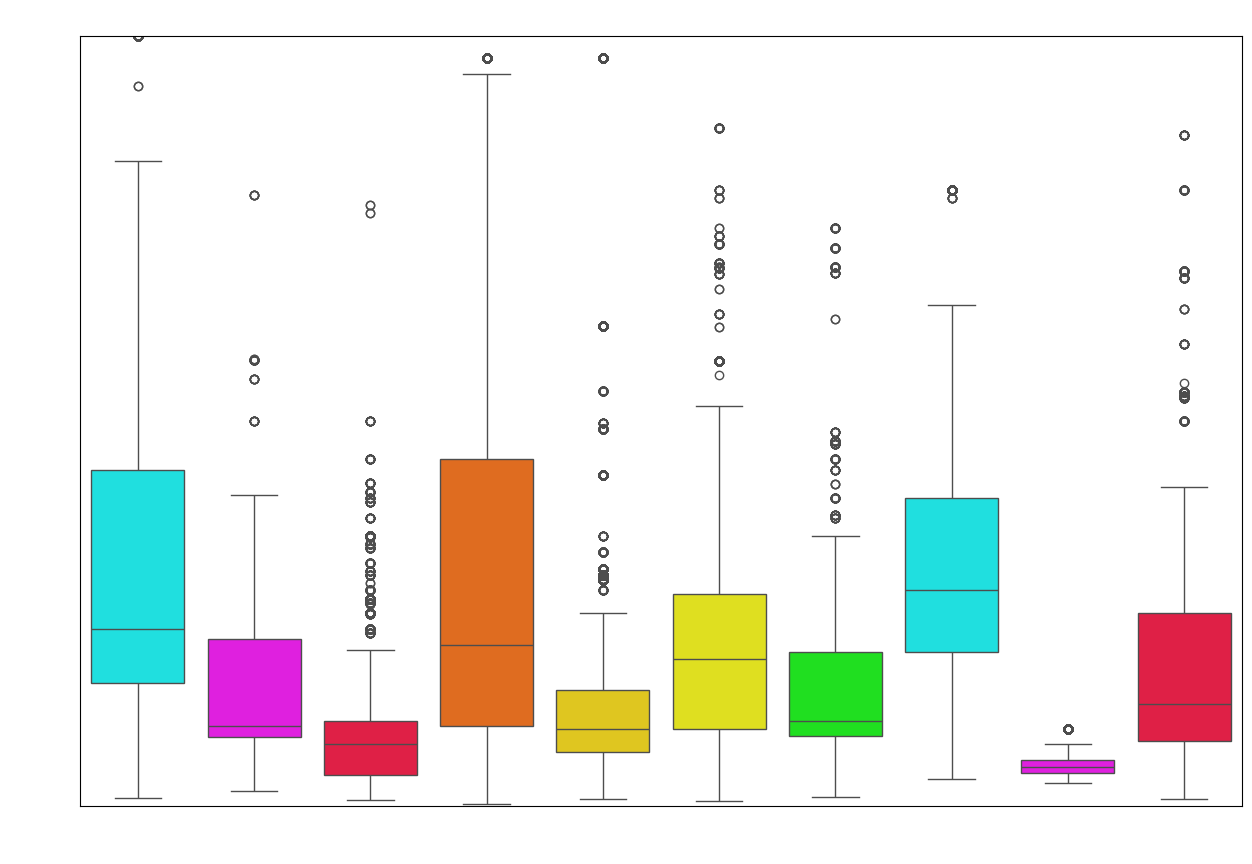

In [ ]:
# Get the top 10 brands based on the number of products
top_10_brands = df['Brand Name'].value_counts().head(10).index

# Filter the data to include only the top 10 brands
top_10_df = df[df['Brand Name'].isin(top_10_brands)]

# Create the boxplot for the top 10 brands vs "Price"
fig, ax = plt.subplots(figsize=(15, 10))

# Create the boxplot using Seaborn
sns.boxplot(x="Brand Name", y="Price", data=top_10_df, ax=ax, palette=fluorescent_palette, hue="Brand Name" , legend=False)

# Title and labels
ax.set_title('Price Distribution by Top 10 Brands', fontsize=16, color='white')
ax.set_xlabel('Brand', fontsize=14, color='white')
ax.set_ylabel('Price', fontsize=14, color='white')

# Change the axis labels and title color to white
ax.tick_params(axis='both', colors='white')

# Configure the grid only on the horizontal background with white color
ax.grid(axis='y', color='white', linestyle='--', linewidth=0.5)

# Set upper limit for the y-axis
plt.ylim(0, 1000)

# Show
plt.show()


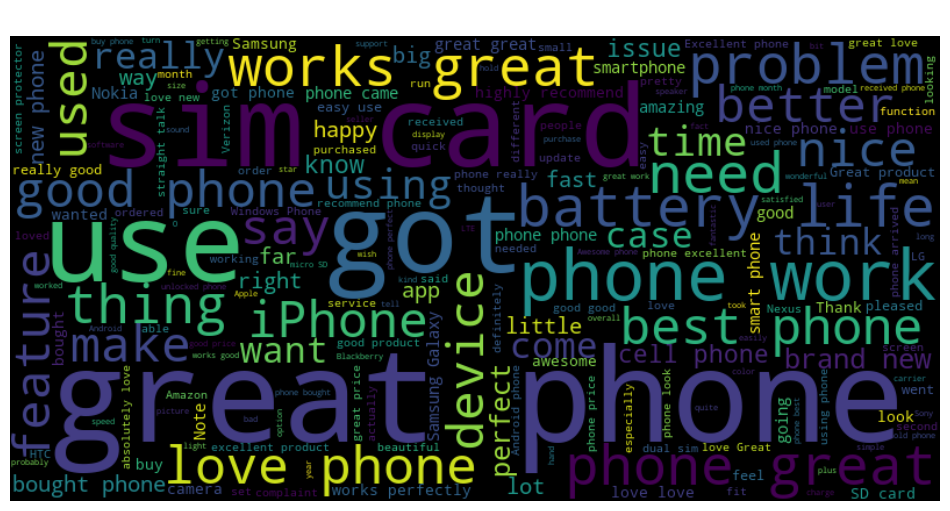

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Filter reviews with a rating of 5
reviews_5 = df[df['Rating'] == 5]['Reviews'].dropna()

# Combine all reviews into a single text
text_5 = " ".join(reviews_5)

# Remove stop words and non-alphabetic characters
filtered_text = " ".join([word for word in text_5.split() if word.lower() not in ENGLISH_STOP_WORDS and word.isalpha()])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(filtered_text)


plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Eliminar los ejes
plt.title("Most Common Words in Reviews with Rating 5", fontsize=16, color='white')
plt.show()


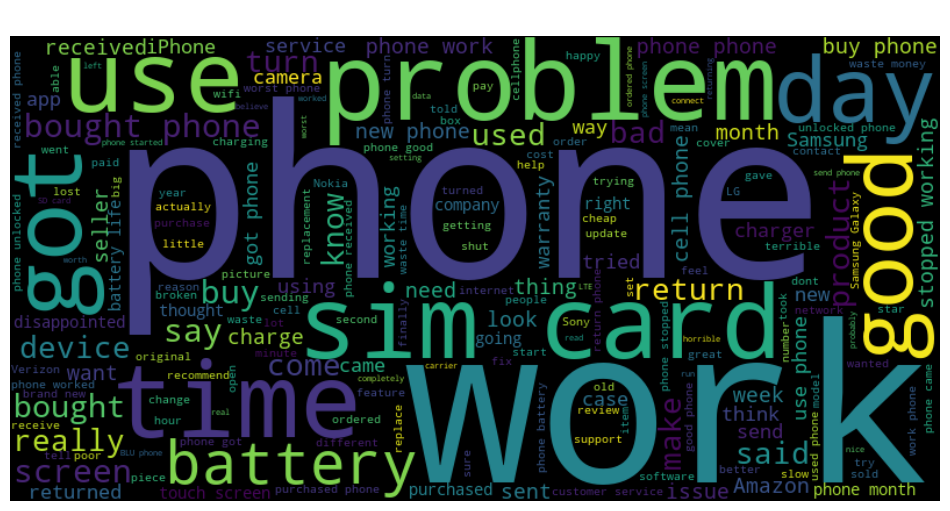

In [ ]:
# Filter reviews with a rating of 1
reviews_5 = df[df['Rating'] == 1]['Reviews'].dropna()

# Combine all reviews into a single text
text_5 = " ".join(reviews_5)

# Remove stop words and non-alphabetic characters
filtered_text = " ".join([word for word in text_5.split() if word.lower() not in ENGLISH_STOP_WORDS and word.isalpha()])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(filtered_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Eliminar los ejes
plt.title("Most Common Words in Reviews with Rating 5", fontsize=16, color='white')
plt.show()


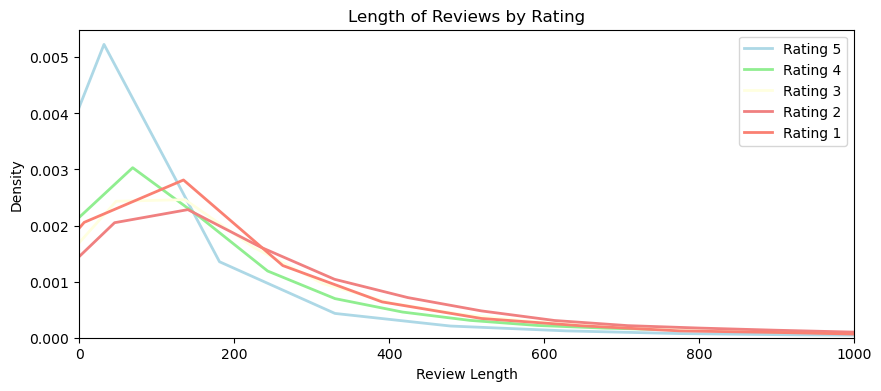

In [ ]:

# Calcular la longitud de las reseñas (ratings)
df['review_length'] = df['Reviews'].apply(len)

# Crear subgráfico para la longitud de las reseñas
plt.figure(figsize=(10, 4))

# Graficar solo las líneas de densidad (kde)
sns.kdeplot(df.loc[df["Rating"] == 5, "review_length"], color='lightblue', label="Rating 5", linewidth=2)
sns.kdeplot(df.loc[df["Rating"] == 4, "review_length"], color='lightgreen', label="Rating 4", linewidth=2)
sns.kdeplot(df.loc[df["Rating"] == 3, "review_length"], color='lightyellow', label="Rating 3", linewidth=2)
sns.kdeplot(df.loc[df["Rating"] == 2, "review_length"], color='lightcoral', label="Rating 2", linewidth=2)
sns.kdeplot(df.loc[df["Rating"] == 1, "review_length"], color='salmon', label="Rating 1", linewidth=2)

# Personalizar etiquetas y título
plt.xlabel("Review Length")
plt.ylabel("Density")
plt.title("Length of Reviews by Rating")
plt.xlim(0, 1000)  # Ajusta el límite del eje x si es necesario
plt.legend(loc='upper right')

plt.show()


# Preprocessing Sentimental Analysis

In [ ]:
# Create the 'Sentiment' column based on the 'Rating' column
def classify_sentiment(rating):
    if rating >= 4:
        return 'Positive'  # Rating 4 or 5 are considered positive
    elif rating == 3:
        return 'Neutral'   # Rating 3 is considered neutral
    else:
        return 'Negative'  # Rating 1 or 2 are considered negative

df['Sentiment'] = df['Rating'].apply(classify_sentiment)

# Check the first few rows to ensure the 'Sentiment' column is added correctly
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment
0,"""clear clean esn"" sprint epic 4g galaxy sph-d7...",samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1,Positive
1,"""clear clean esn"" sprint epic 4g galaxy sph-d7...",samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0,Positive
2,"""clear clean esn"" sprint epic 4g galaxy sph-d7...",samsung,199.99,5,Very pleased,0,Positive
3,"""clear clean esn"" sprint epic 4g galaxy sph-d7...",samsung,199.99,4,It works good but it goes slow sometimes but i...,0,Positive
4,"""clear clean esn"" sprint epic 4g galaxy sph-d7...",samsung,199.99,4,Great phone to replace my lost phone. The only...,0,Positive


In [ ]:
nlp = spacy.load("en_core_web_sm") # python -m spacy download en_core_web_sm ---- do this on terminal after conda activate

In [ ]:
# Cargar el modelo de spaCy en inglés
nlp = spacy.load("en_core_web_sm")

# Función de lematización
def cleanText(raw_text):
    # Convertir a minúsculas
    raw_text = raw_text.lower()
    
    # Procesar el texto con spaCy
    doc = nlp(raw_text)
    
    # Lematizar y eliminar stopwords y palabras no alfabéticas
    lemmatized_text = " ".join([token.lemma_ for token in doc if token.lemma_ not in STOP_WORDS and token.is_alpha])
    
    return lemmatized_text

# Aplicar la función de lematización a la columna 'Reviews' (o la columna que desees)
df["text_clean"] = df["Reviews"].apply(cleanText)

# Verificar los primeros registros
print(df["text_clean"].head())

0    I feel so lucky to have find this used phone t...
1    nice phone nice up grade from my pantach revue...
2                                         very pleased
3    it work good but it go slow sometimes but its ...
4    great phone to replace my lost phone the only ...
Name: text_clean, dtype: object


In [ ]:
#df.to_feather('processed_data.ftr')

In [ ]:
# Utilizar factorize para convertir las etiquetas de sentimiento a valores numéricos
map_label = dict(enumerate(df['Sentiment'].factorize()[1]))

# Ahora map_label tendrá algo como {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
print(map_label)

# Para agregar una columna con las etiquetas numéricas al DataFrame
df['Sentiment_encoded'] = df['Sentiment'].factorize()[0]

In [ ]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment,text_clean
0,"""clear clean esn"" sprint epic 4g galaxy sph-d7...",samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1,Positive,I feel so lucky to have find this used phone t...
1,"""clear clean esn"" sprint epic 4g galaxy sph-d7...",samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0,Positive,nice phone nice up grade from my pantach revue...
2,"""clear clean esn"" sprint epic 4g galaxy sph-d7...",samsung,199.99,5,Very pleased,0,Positive,very pleased
3,"""clear clean esn"" sprint epic 4g galaxy sph-d7...",samsung,199.99,4,It works good but it goes slow sometimes but i...,0,Positive,it work good but it go slow sometimes but its ...
4,"""clear clean esn"" sprint epic 4g galaxy sph-d7...",samsung,199.99,4,Great phone to replace my lost phone. The only...,0,Positive,great phone to replace my lost phone the only ...
